# Project: Investigating `Top movies` database
## TMDB Movie Dataset
### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
#### the goal form this analysis is to answer some questions from the analysis process based on the data given
### Questions
1.   Which genres are most popular from year to year?
2.   What kinds of properties are associated with movies that have high revenues?
3.   what is the inflation rate?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

#### first, import all packages you need for analysis process

In [1]:
# impor all of needed packages.
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

#### Loading CSV file into a Pnadas dataframe

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

#### print dataset dimensions of the dataframe


In [3]:
# print dataset dimensions
df.shape

(10866, 21)

### Showing some summary statistics about the data we are working on

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### viewing the dataframe

In [5]:
# take a look at the dataframe
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


## Setting index column

In [6]:
# set movie title as an index column
df.set_index('original_title', inplace=True)
df.head(1)

,id,imdb_id,popularity,budget,revenue,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,,,,,,,,
Jurassic World,135397,tt0369610,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


## Checking data types

In [7]:
# take a look at dataframe data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#### Looks like all columns are in the proper type. We just need to cast `release_date` column to `date` type

In [8]:
# chage release date column to date type.
df['release_date'] = pd.to_datetime(df['release_date'])
#chek
df['release_date'].head(1)

original_title
Jurassic World   2015-06-09
Name: release_date, dtype: datetime64[ns]

## Drop unuseful columns.

In [9]:
# drop columns that aren't useful for our questions
df.drop(['imdb_id','homepage','tagline','keywords','overview', 'production_companies','release_date'],inplace=True, axis=1)
df.head(1)

,id,popularity,budget,revenue,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,
Jurassic World,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


### ploting the dataframe

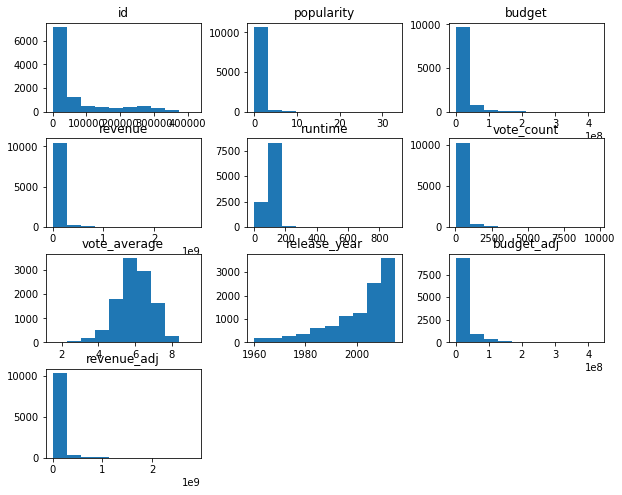

In [10]:
df.hist(figsize=(10,8),grid=False);

## Remove duplicates

In [11]:
# chek duplicates columns
df.duplicated().sum()

1

In [12]:
# removing duplicates
df.drop_duplicates(inplace=True)

# chek if duplicates are gone
df.duplicated().sum()

0

## Drop null values

In [13]:
# chek for null values
df.isnull().sum()

id               0
popularity       0
budget           0
revenue          0
cast            76
director        44
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

#### chek dataframe dimensions

In [14]:
# chek data dimensions before droping nulls
df.shape

(10865, 13)

In [15]:
# drop null values
df.dropna(inplace=True)

# chek for data dimensions after droping nulls
df.shape

(10731, 13)

#### there are 114 rows of data has been droped from the dataframe

In [16]:
# chek if all duplicates are gone
df.isnull().sum()

id              0
popularity      0
budget          0
revenue         0
cast            0
director        0
runtime         0
genres          0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

##### there are no null values

<a id='eda'></a>
# Exploratory Data Analysis

## Research Question 1: Which genres are most popular from year to year?

### spliting genres column by "|"

In [17]:
df = df.assign(genres=df.genres.str.split("|")).explode('genres')
df.head(1)

,id,popularity,budget,revenue,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,
Jurassic World,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09


### grouping the dataframe by `genres` column and sorting values to see the highies genre popularity in `2015.`

In [18]:
df1 = df[df['release_year'] == 2015]
df1 = pd.DataFrame(df1.groupby(['genres'])['popularity'].mean())
df1 = df1.sort_values(['popularity','genres'], ascending=False)
df1

,popularity
genres,
Adventure,3.283786
Western,3.178796
Science Fiction,2.297221
Action,2.272209
Fantasy,1.740228
Crime,1.722032
Thriller,1.401877
Family,1.369038
War,1.284511


### `Adventure` is the highest popularity genre in 2015

### grouping dataframe by `genres` and sorting values to see the highies genre popularity in `1980.`

In [19]:
df1 = df[df['release_year'] == 1980]
df1 = pd.DataFrame(df1.groupby(['genres'])['popularity'].mean())
df1 = df1.sort_values(['popularity','genres'], ascending=False)
df1

,popularity
genres,
Science Fiction,0.897143
Adventure,0.788612
TV Movie,0.646441
Action,0.594729
Romance,0.561402
Music,0.513350
Horror,0.446982
Comedy,0.438154
Crime,0.416538


### `Science Fiction` is the highest popularity genre in 1980

# grouping the dataframe by `genres` and sorting values to see the highies genre popularity in `1966.`

In [20]:
df1 = df[df['release_year'] == 1966]
df1 = pd.DataFrame(df1.groupby(['genres'])['popularity'].mean())
df1 = df1.sort_values(['popularity','genres'], ascending=False)
df1

,popularity
genres,
Animation,0.585717
Fantasy,0.424771
Family,0.398896
Foreign,0.361556
Romance,0.351903
Crime,0.340702
Drama,0.339766
History,0.335649
Comedy,0.323658


### `Animation` is the highest popularity genre in 1966

### creating a dataframe of `generes` and `popularity` columns only.

In [21]:
df1 = df.copy()
df1.drop(['revenue','id','revenue_adj','budget','budget_adj','cast','director','runtime','release_year','vote_count','vote_average'], inplace=True, axis=1)
df1.head(1)

,popularity,genres
original_title,,
Jurassic World,32.985763,Action


#### defining plots function.

In [22]:
# defining a fucntion to plot varaibles for scatter plots.
def plt_labels(xl,yl,t):
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(t)

# defining a fucntion to plot varaibles for Pandas plots.
def pan_labels(fig, xl, yl, t):
    fig.set_xlabel(xl)
    fig.set_ylabel(yl)
    fig.set_title(t)

### ploting each genre in `genres` column to compare the popularity of each one.

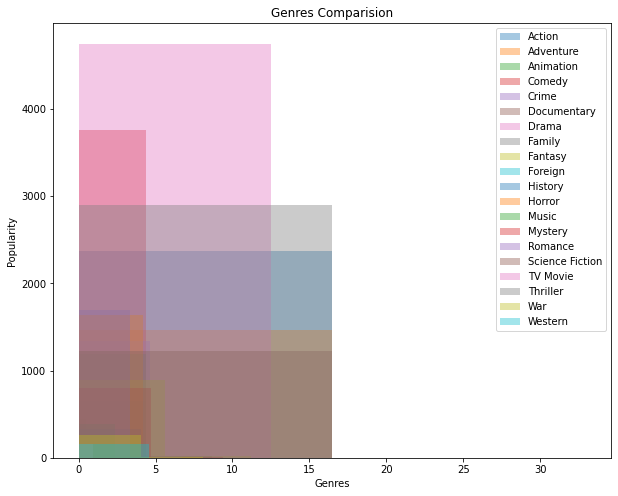

In [23]:
fig = df1.groupby('genres').popularity.hist(grid=False, bins=2, legend=True, alpha=0.4,figsize=(10,8));
for ax in fig:
    pan_labels(ax, "Genres", "Popularity", 'Genres Comparision')

### Pie Chart

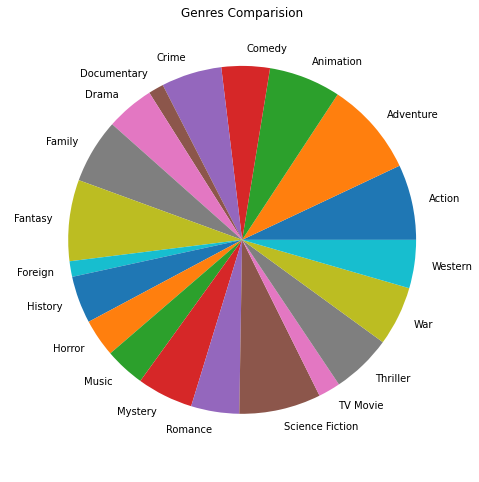

In [24]:
fig = df1.groupby('genres')['popularity'].mean().plot(kind='pie',figsize=(10,8));
pan_labels(fig, ' ', ' ', 'Genres Comparision')

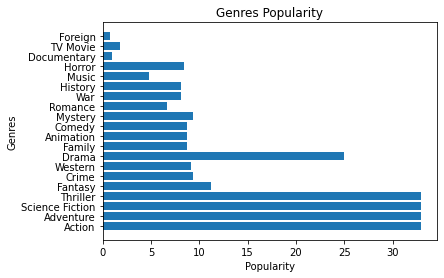

In [25]:
plt.barh(df1['genres'],df1['popularity']);
plt_labels('Popularity', 'Genres', 'Genres Popularity');

### As we can see the `Action, Adventure, Science Fiction, and Thriller` genres are the highest popularity through years.

## Research Question 2: What kinds of properties are associated with movies that have high revenues?

In [26]:
# view dataframe columns relations
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.007583,-0.123462,-0.083063,-0.086309,-0.020356,-0.064701,0.490839,-0.174643,-0.125512
popularity,0.007583,1.000000,0.540953,0.665448,0.143352,0.794716,0.238730,0.112216,0.506537,0.609829
budget,-0.123462,0.540953,1.000000,0.729125,0.203350,0.641328,0.105262,0.150105,0.968022,0.619772
revenue,-0.083063,0.665448,0.729125,1.000000,0.174110,0.798464,0.199173,0.082643,0.699672,0.920798
runtime,-0.086309,0.143352,0.203350,0.174110,1.000000,0.177079,0.176156,-0.135433,0.238275,0.189761
vote_count,-0.020356,0.794716,0.641328,0.798464,0.177079,1.000000,0.283649,0.133027,0.593456,0.714724
vote_average,-0.064701,0.238730,0.105262,0.199173,0.176156,0.283649,1.000000,-0.130566,0.118706,0.220869
release_year,0.490839,0.112216,0.150105,0.082643,-0.135433,0.133027,-0.130566,1.000000,0.044500,-0.046399
budget_adj,-0.174643,0.506537,0.968022,0.699672,0.238275,0.593456,0.118706,0.044500,1.000000,0.643020
revenue_adj,-0.125512,0.609829,0.619772,0.920798,0.189761,0.714724,0.220869,-0.046399,0.643020,1.000000


### Realation between budjet and revinue

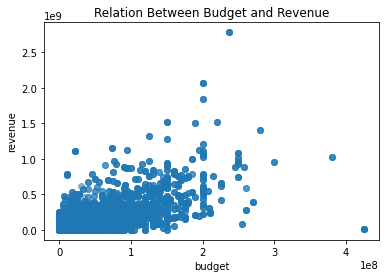

In [27]:
# plot the relation between budget and revenue columns using scatter plot function.
plt.scatter(df.budget, df.revenue, alpha=0.5)
plt_labels('budget', 'revenue', 'Relation Between Budget and Revenue')

#### As we can see from the plot, `the relation between budget and revenue are positive.` This means the more the budget the more the revenue.

## Inflation Rate based on 2010 Dollars

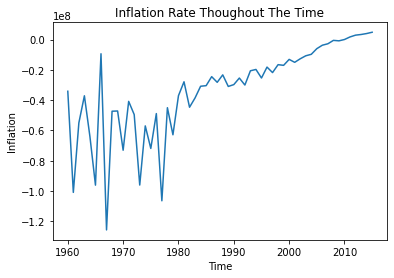

In [30]:
df['inf'] = df['revenue'] - df['revenue_adj']
fig = df.groupby('release_year')['inf'].mean().plot(kind='line');
pan_labels(fig, 'Time', 'Inflation', 'Inflation Rate Thoughout The Time')

### As we can see from the plot, the inflation has increased throughout the years.

<a id='conclusions'></a>
# Conclusions

## Results:
1.   the most popular genre through years is the `Adventure` genre like `2015`. but there are exceptions like `1966` the most popular genre was `Animation` and `1980` was `Science Fiction.`
2.   `Budget` has a direct relation with `revenue`.
3.   `the inflation` has increased since year `2010` to `2015`.
4.   `Run Time` not seem to have a relation with `revenue.`
5.  `Inflation` has incresed throughout the time based on `2010` dollar.

## Limitations:
1.  `genres` and `cast` columns were seperated with '|' so I had to split them, this caused duplicate rows in all columns except `genres` column.
2.  `production_companies` and `revenue` columns have so many zeros, this might has affected the analysis process and the visuals.